# RLC Bandpass Filters

## Introduction

This file shows how to calculate values for RLC in both a Series and Parallel RLC Bandpass filter.

## 1) Parrallel Circuit

### A) Solving for the Transfer Function

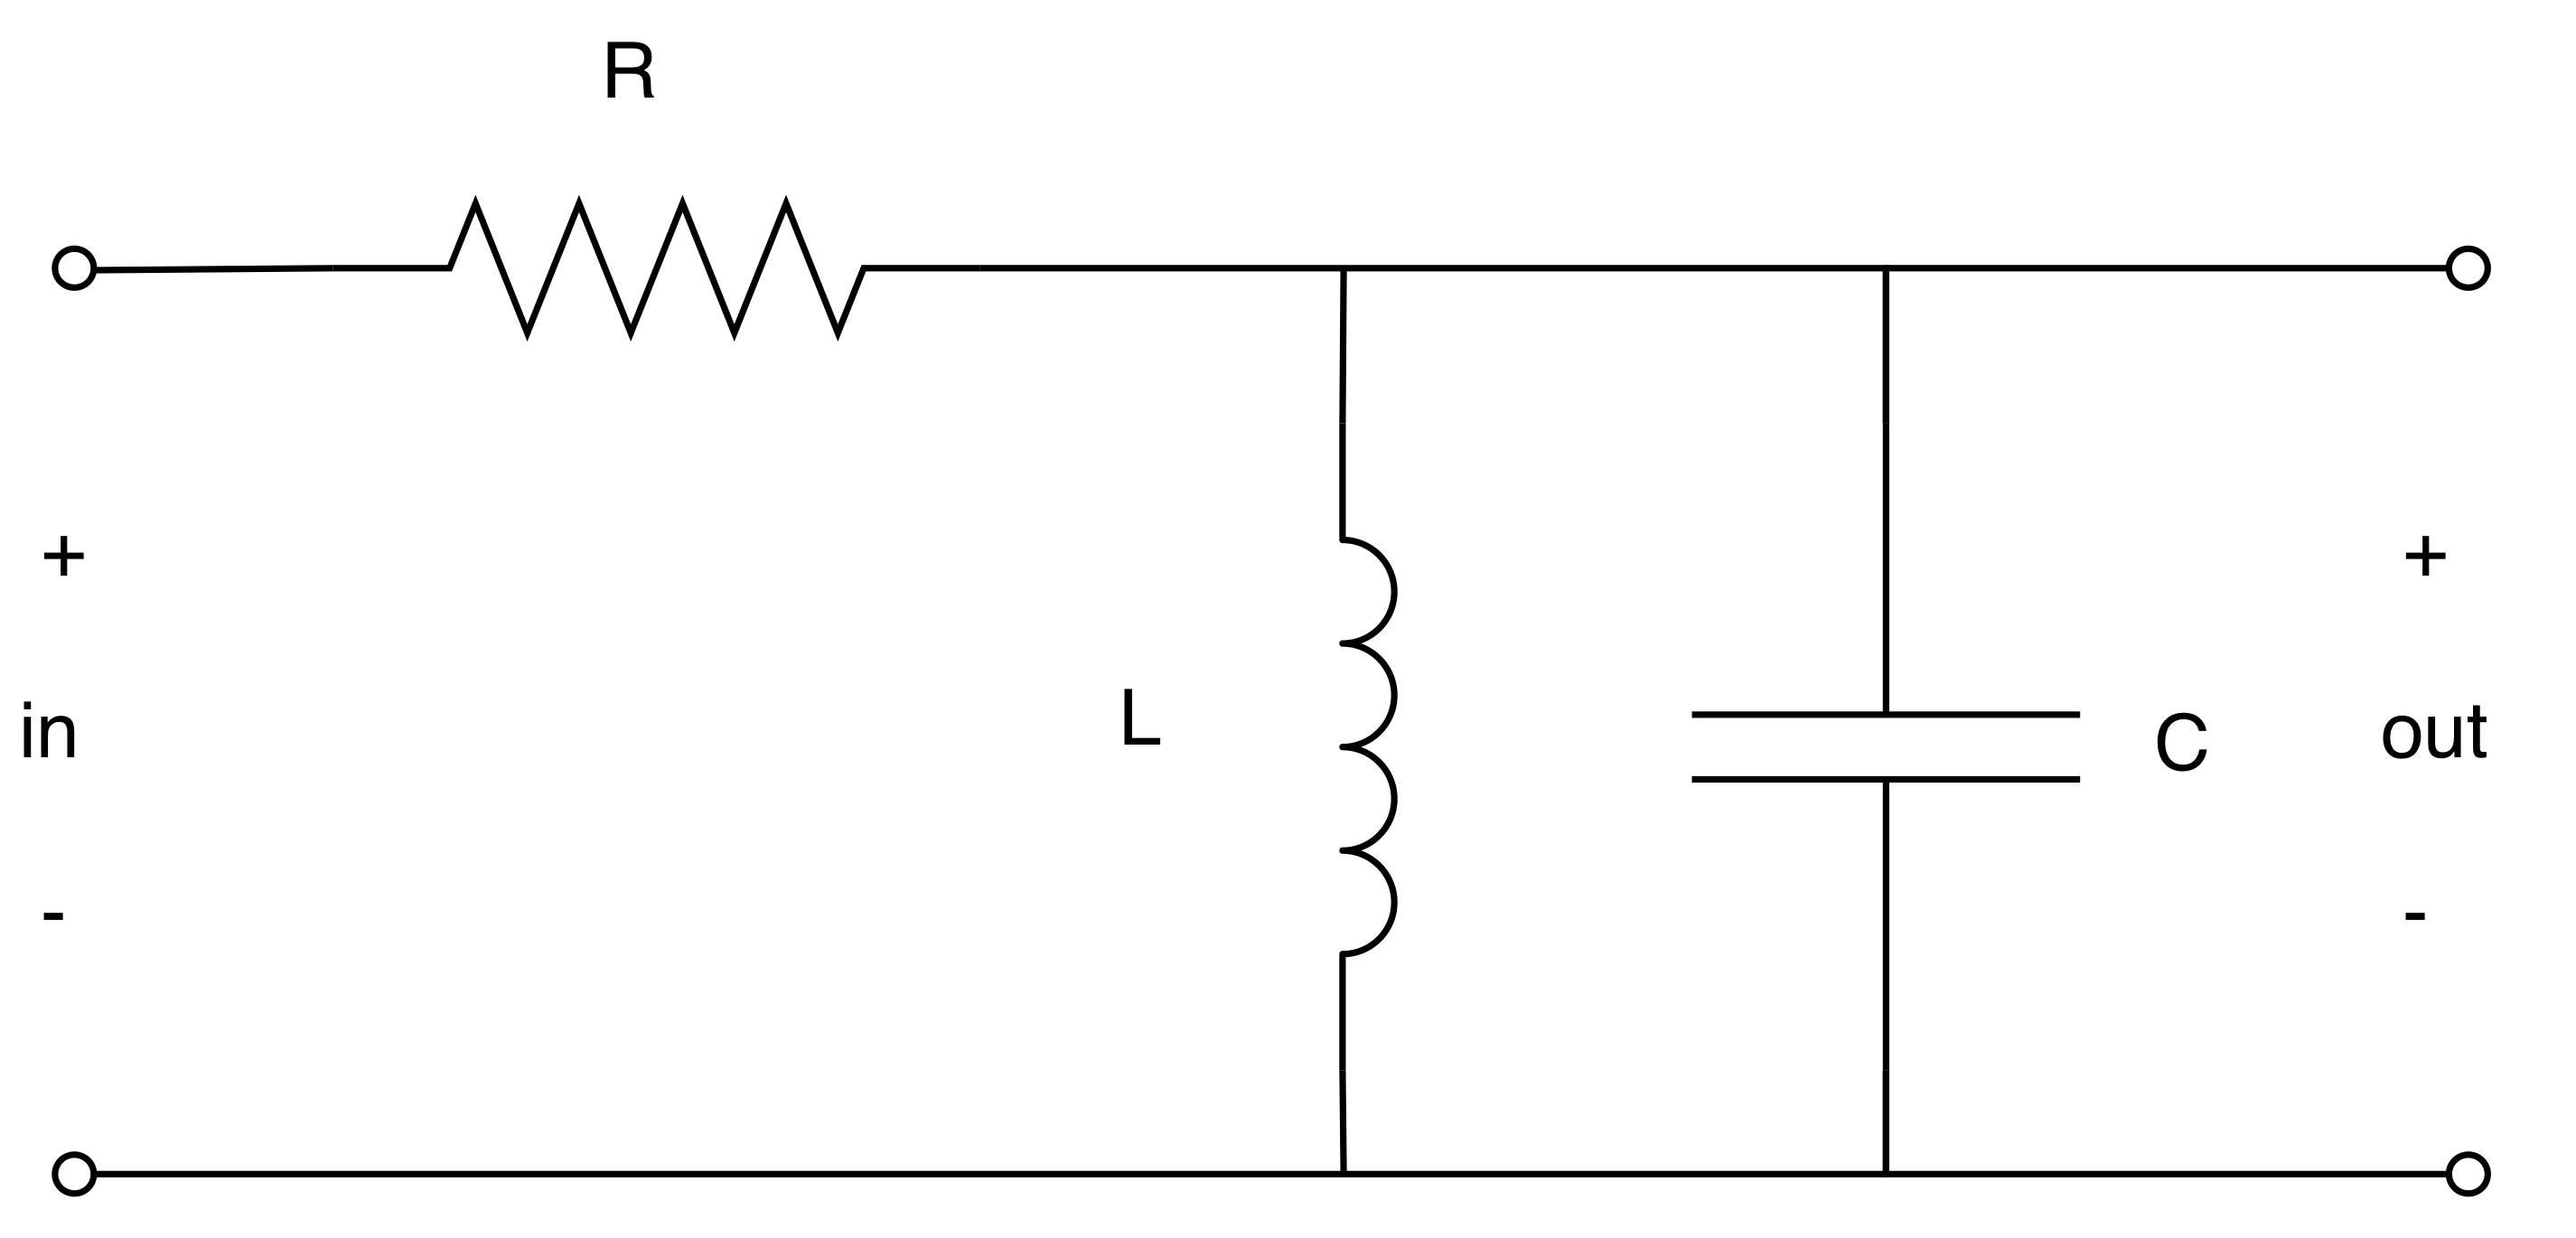

To find the transfer function of this circuit, first take the circuit into the S-Domain.
$$V_{in}(t) \to V_{in}(s),$$
$$V_{out}(t) \to V_{out}(s),$$
$$R \to R,$$
$$L \to Ls, and $$
$$C \to \frac{1}{Cs}.$$

Then do a KCL at the node Directly above the inductor. This gives the following equation:

$$\frac{V_{in}(s) - V_{out}(s)}{R} = V_{out}(\frac{1}{\frac{1}{Cs}} + \frac{1}{Ls})$$

Moving all Vout's to one side yields:

$$\frac{V_{in}(s)}{R} = V_{out}(s)(\frac{1}{\frac{1}{Cs}} + \frac{1}{Ls} + \frac{1}{R})$$

Next, divide by Vout and multiple by Vin to both sides. This yields:

$$\frac{V_{out}(s)}{V_{in}(s)} = \frac{\frac{1}{R}}{\frac{1}{\frac{1}{Cs}} + \frac{1}{Ls} + \frac{1}{R}}$$

Next, simply to standard form:

$$\frac{V_{out}(s)}{V_{in}(s)} = \frac{\frac{1}{R}}{Cs + \frac{1}{Ls} + \frac{1}{R}}$$

$$\frac{V_{out}(s)}{V_{in}(s)} = \frac{\frac{s}{R}}{Cs^2 + \frac{s}{R} + \frac{1}{L}}$$

$$\frac{V_{out}(s)}{V_{in}(s)} = \frac{\frac{s}{RC}}{s^2 + \frac{s}{RC} + \frac{1}{LC}}$$

$$H(s) = \frac{Bs}{s^2 + Bs + w_{0}^2} = \frac{\frac{1}{RC}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}$$

### B) Finding the RLC

Let's start with the equation for the initial cutoff frequency as seen in our ECE 212 notes:

$$w_{c_{1}} = \frac{-B}{2} + \sqrt{(\frac{B}{2})^2 + (w_{0})^2}$$

where: $w_{c_{1}}$ is the initial cutoff frequency, 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$B$ is the Bandwidth ($w_{c_{2}} - w_{c_{1}}$), and
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w_{0}$ is the center frequency.

Solving for $w_{0}$ will yield:

$$w_{0} = \sqrt{w_{c{1}}(w_{c{1}} + B)}$$

Since $B=w_{c_{2}} - w_{c_{1}}$,

$$w_{c_{2}} = B +  w_{c_{1}}$$

Plugging into the $w_{0}$ equation will produce:

$$w_{0} = \sqrt{w_{c{1}}*w_{c{2}}}$$

For both the Series and Parallel Circuits the center frequency in rad/s is:

$$w_{0} = \frac{1}{\sqrt{LC}}$$

Plugging this in and simplying with yield:

$$ \frac{1}{LC} = w_{c{1}}*w_{c{2}}$$

Seen in the transfer function,
$$B = \frac{1}{RC}$$

Rearrange to get:

$$C= \frac{1}{B*R}$$

Plug into $ \frac{1}{LC} = w_{c{1}}*w_{c{2}}$ and rearrange to get:

$$ L = \frac{1}{C*w_{c{1}}*w_{c{2}}}$$

## 2) Series Circuit

### A) Solving for the Transfer Function

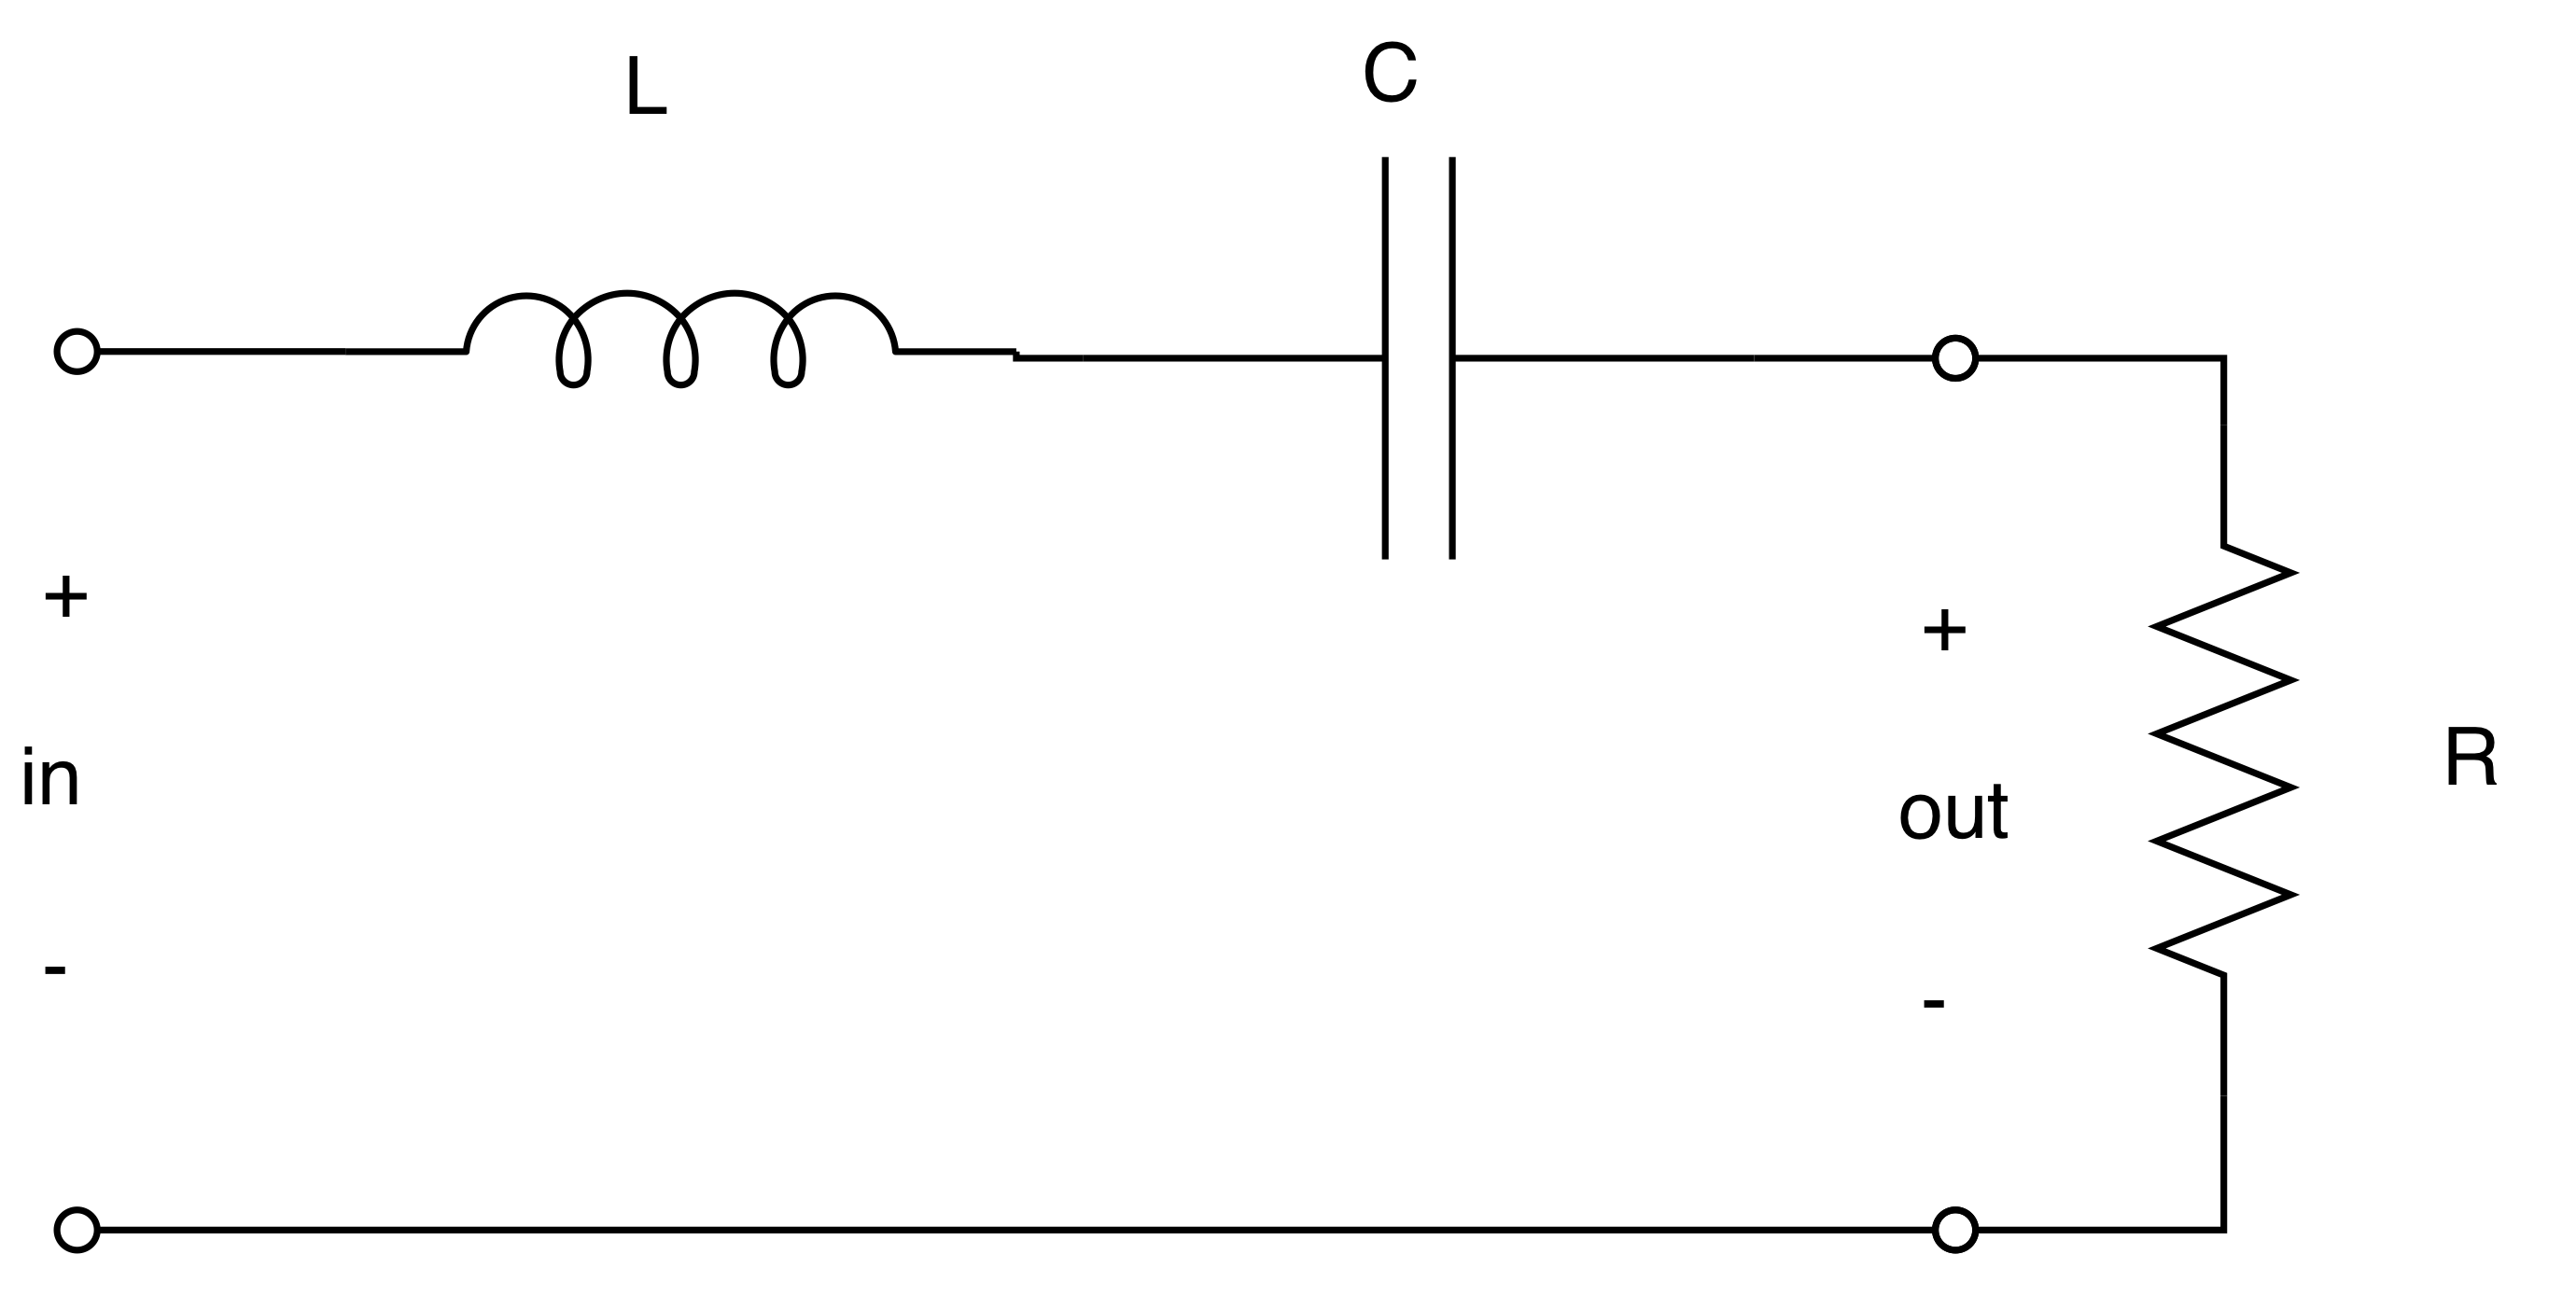

To find the transfer function of this circuit, first take the circuit into the S-Domain.
$$V_{in}(t) \to V_{in}(s),$$
$$V_{out}(t) \to V_{out}(s),$$
$$R \to R,$$
$$L \to Ls, and $$
$$C \to \frac{1}{Cs}.$$

This can be do simply by using voltage division. Doing so gives the following equation:

$$V_{out} = V_{in} * \frac{R}{R+sL+\frac{1}{Cs}}$$

Dividing both sides by $V_{in}$ and reducing yields:

$$H(s) = \frac{Bs}{s^2 + Bs + w_{0}^2} = \frac{\frac{Rs}{L}}{s^s + \frac{Rs}{L} + \frac{1}{LC}}$$

### B) Finding the RLC

Since both circuits are bandpass filters, the $w_{0}$ will also hold for the series circuit, but the bandwidth will be:

$$B = \frac{R}{L}$$

Rearrange to get (notice this is the same as the parallel as the center frequency should be the same for both filters, right?):

$$L= \frac{R}{B} = \frac{1}{C*w_{c{1}}*w_{c{2}}} $$

Solve for C,

$$ C = \frac{B}{R*w_{c{1}}*w_{c{2}}}$$

## 2) Computational Solution

In [8]:
from numpy import sqrt, pi

# Given Values
rads = 2*pi      #rads/s
B= 200*rads      #Bandwidth
wc1= 1800*rads   #initial cutoff
wc2 = 2000*rads  #final cutoff

# Determine R,L,C,wc's for Parallel RLC Circuit

Rp = 1000  #Must choose an arbitary Value
Cp = 1/(B*Rp)
Lp = 1/(Cp*wc1*wc2)
Bp = (1/(Rp*Cp))
wo_p = (1/sqrt(Lp*Cp))
wp1 = ((-Bp/2) + sqrt(((Bp/2)**2) + ((wo_p)**2)))
wp2 = ((Bp/2) + sqrt(((Bp/2)**2) + ((wo_p)**2)))

print('Parallel RLC Results\n\n'
      'R =', Rp, '\n'
      'L =', Lp, '\n'
      'C =', Cp, '\n'
      'wc1 =', wp1, '\n'
      'wc2 =', wp2, '\n')

# Determine R,L,C,wc's for Series RLC Circuit

Rs = Rp #To match AV from series circuit
Cs = B/(wc1*wc2*Rs)
Ls = Rs/B
Bs = (Rs/Ls)
wo_s = (1/sqrt(Ls*Cs))
ws1 = ((-Bs/2) + sqrt(((Bs/2)**2) + ((wo_s)**2)))
ws2 = ((Bs/2) + sqrt(((Bs/2)**2) + ((wo_s)**2)))

print('Series RLC Results\n\n'
      'R =', Rs, '\n'
      'L =', Ls, '\n'
      'C =', Cs, '\n'
      'wc1 =', ws1, '\n'
      'wc2 =', ws2, '\n')

Parallel RLC Results

R = 1000 
L = 0.008841941282883075 
C = 7.957747154594767e-07 
wc1 = 11309.733552923255 
wc2 = 12566.370614359173 

Series RLC Results

R = 1000 
L = 0.7957747154594766 
C = 8.841941282883076e-09 
wc1 = 11309.733552923255 
wc2 = 12566.370614359173 



#### Keep in mind that these values and frequencies are with W in RAD/S!!!!

#### This is because of the sig.bode() function outputs in terms of w (rad/s)

## Proof

Text(0.5, 1.0, 'Bandpass Filter (Parallel)')

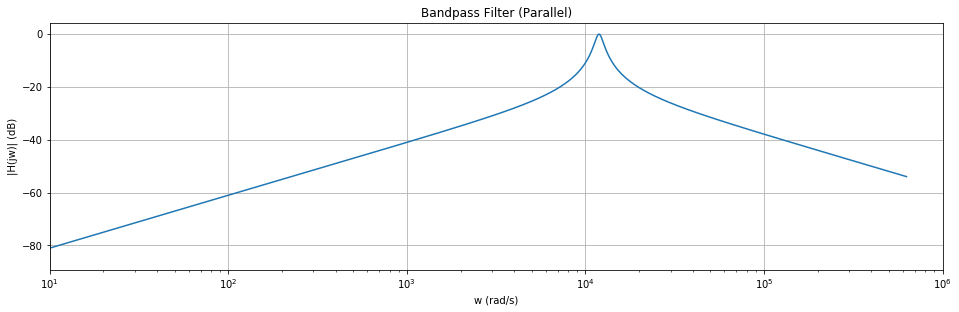

In [11]:
## Taken from ECE 350 Lab_10 ##

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Parallel Circuit

w_i = 1     #initial frequency
w_f = 1e5   #final frequency
T = 10      #steps to be taken
w = np.arange(w_i*rads,w_f*rads,T)     #creating array of frequency values

num_bode_p = [1/(Rp*Cp), 0]             #numerator of transfer function
den_bode_p = [1, 1/(Rp*Cp), 1/(Lp*Cp)]  #denominator of transfer function
w_bode_p, mag_p, phase_p = sig.bode((num_bode_p,den_bode_p), w)

myFigSize = (16,10)
plt.figure(figsize=myFigSize)
plt.subplot(2,1,1)
plt.xlim([10,10e5])
plt.semilogx(w_bode_p,mag_p)
plt.grid(True)
plt.ylabel('|H(jw)| (dB)')
plt.xlabel('w (rad/s)')
plt.title('Bandpass Filter (Parallel)')

Text(0.5, 1.0, 'Bandpass Filter (Series)')

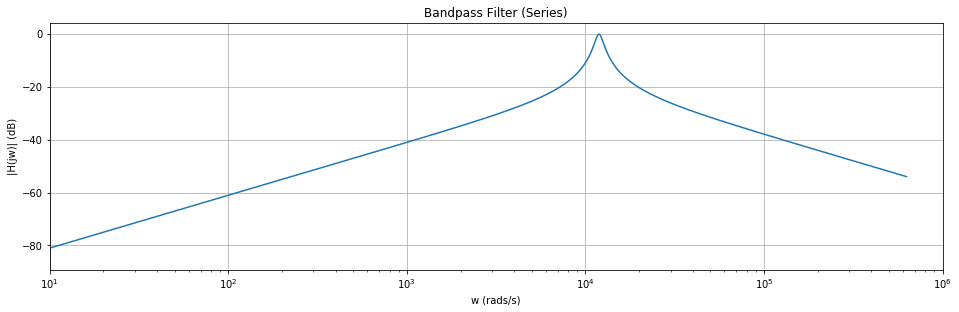

In [12]:
#Series Circuit

num_bode_s = [Rs/Ls, 0]             #numerator of transfer function
den_bode_s = [1, Rs/Ls, 1/(Ls*Cs)]  #denominator of transfer function
w_bode_s, mag_s, phase = sig.bode((num_bode_s,den_bode_s), w)

myFigSize = (16,10)
plt.figure(figsize=myFigSize)
plt.subplot(2,1,1)
plt.semilogx(w_bode_s,mag_s)
plt.xlim([10,10e5])
plt.grid(True)
plt.ylabel('|H(jw)| (dB)')
plt.xlabel('w (rads/s)')
plt.title('Bandpass Filter (Series)')

## Conclusion

First, these are only one possibility for each of the circuit outputs. There are many more configuration of the output voltages for each of the circuits. Second, no matter the initial arbitrary Resistor value, the L & C values will adjust to meet your Bandwidth and cutoff frequency specifications. Third, seen in the Bode plots, the filters are identical and only differ in value of components.